In [13]:
import netCDF4 as nc
import numpy as np
import pystan
import arviz


events = ["GW150914","GW170104","GW170823","GW190519_153544",
		"GW190521","GW190521_074359","GW190706_222641",
		"GW190828_063405","GW200224_222234","GW200311_115853"]

ds = {}
points = {}

for event in events:
	fn = f"./ChargedResults/{event}/{event}-charged-posteriors.nc"
	a = nc.Dataset(fn)
	ds[event] = a
	print(event)
	points[event] = np.array([np.array(x) for x in zip(a['posterior']['chi'][:].flatten(),a['posterior']['Q_charge'][:].flatten())])


GW150914
GW170104
GW170823
GW190519_153544
GW190521
GW190521_074359
GW190706_222641
GW190828_063405
GW200224_222234
GW200311_115853


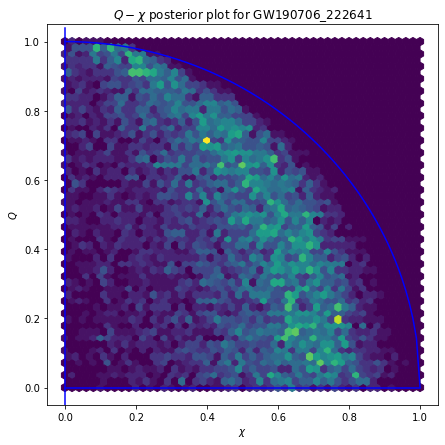

In [3]:
import matplotlib.pyplot as plt

eventname = 'GW190706_222641'
fig, ax = plt.subplots(1,figsize=(7,7))
ax.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
ax.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
ax.axvline(0.0,ymin=0.0,ymax=0.99,c='b')
ax.hexbin(x = points[eventname][:,0], y = points[eventname][:,1],gridsize=50, extent=(0,1,0,1))
ax.set_xlabel("$\chi$")
ax.set_ylabel("$Q$")
ax.set_title(f"$Q-\chi$ posterior plot for {eventname}")
plt.show()

In [4]:
## Changing Variables:
def chiq_to_rtheta(arr):
    A = np.sqrt(arr[:,0]**2 + arr[:,1]**2)
    theta = np.arctan(arr[:,1]/arr[:,0])
    return np.array([A,theta]).transpose()

def rtheta_to_chiq(arr):
    chi = arr[:,0]*np.cos(arr[:,1])
    Q = arr[:,0]*np.sin(arr[:,1])
    return np.array([chi,Q]).transpose()





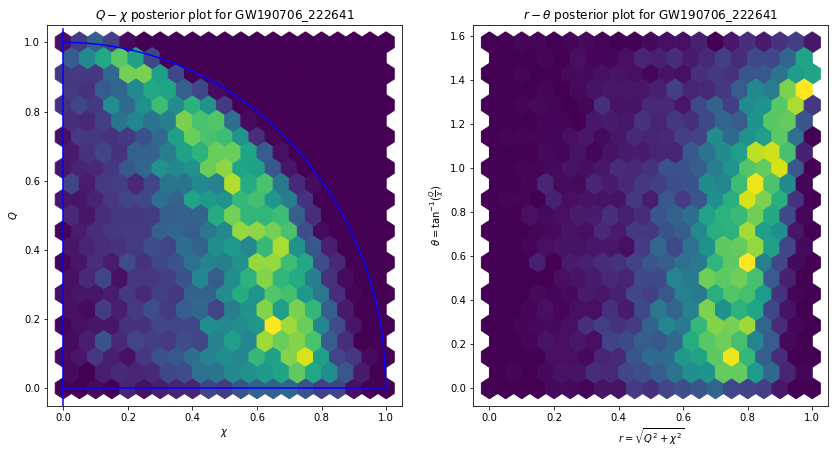

In [6]:
eventname = 'GW190706_222641'

def show_plot(eventname, points):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
    ax1,ax2 = axes
    newpoints = chiq_to_rtheta(points[eventname])
    
    ax1.plot(np.linspace(0,1,100), np.sqrt(1 - np.linspace(0,1,100)**2),c='b')
    ax1.plot(np.linspace(0,1,100), 0.0*np.linspace(0,1,100),c='b')
    ax1.axvline(0.0,ymin=0.0,ymax=0.99,c='b')
    ax1.hexbin(x = points[eventname][:,0], y = points[eventname][:,1],gridsize=20, extent=(0,1,0,1))
    ax1.set_xlabel("$\chi$")
    ax1.set_ylabel("$Q$")
    ax1.set_title(f"$Q-\chi$ posterior plot for {eventname}")

    ax2.hexbin(x = newpoints[:,0], y = newpoints[:,1],gridsize=20, extent=(0,1,0,np.pi/2))
    ax2.set_xlabel("$r = \\sqrt{Q^2 + \\chi^2}$")
    ax2.set_ylabel("$\\theta = \\tan^{-1}(\\frac{Q}{\chi})$")
    ax2.set_title(f"$r-\\theta$ posterior plot for {eventname}")
    plt.show()
    
show_plot(eventname, points)

### Pystan tutorial

In [ ]:
coin_dat = {
             'n': 100,
             'y': 61,
            }

compiled = pystan.StanModel(file='coin_toss.stan')
fit = compiled.sampling(data=coin_dat, iter=100, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aeeb0494fd89755208ea26dd2704eb83 NOW.
/Users/asadh/opt/anaconda3/envs/ringdown/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/x2/flf3cm9506vdxng0c9g04p440000gn/T/tmphj3g2so9/stanfit4anon_model_aeeb0494fd89755208ea26dd2704eb83_95140303482533700.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [9]:
#fit

In [10]:
#arviz.from_pystan(fit)

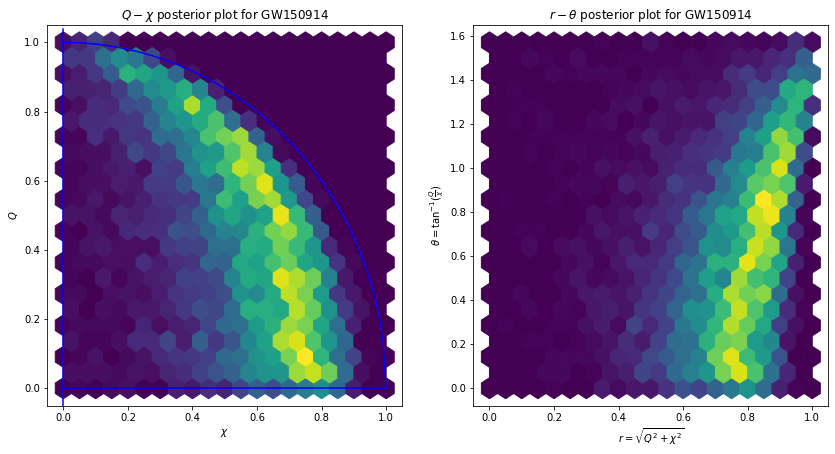

In [14]:
show_plot("GW150914", points)

### Actually Running

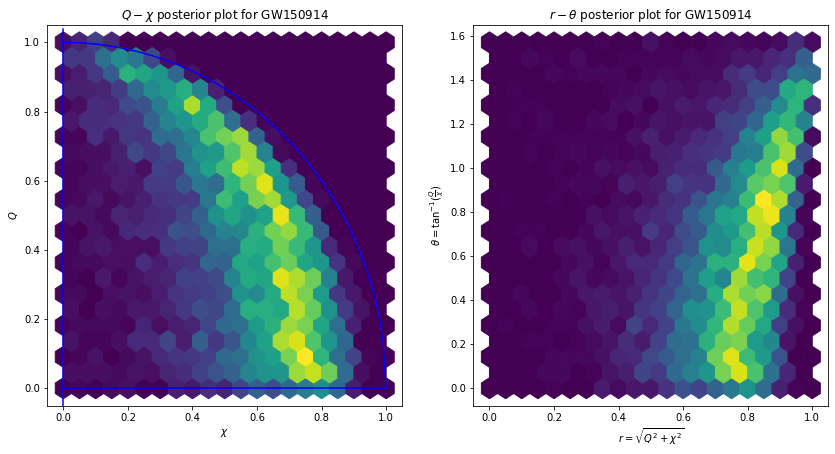

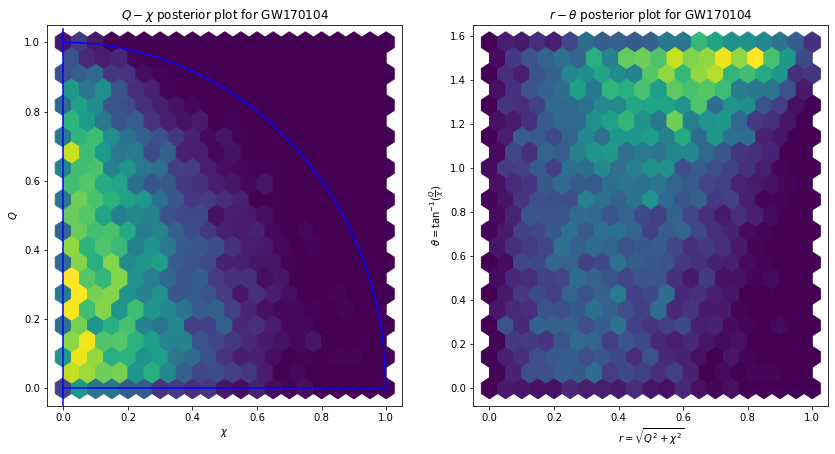

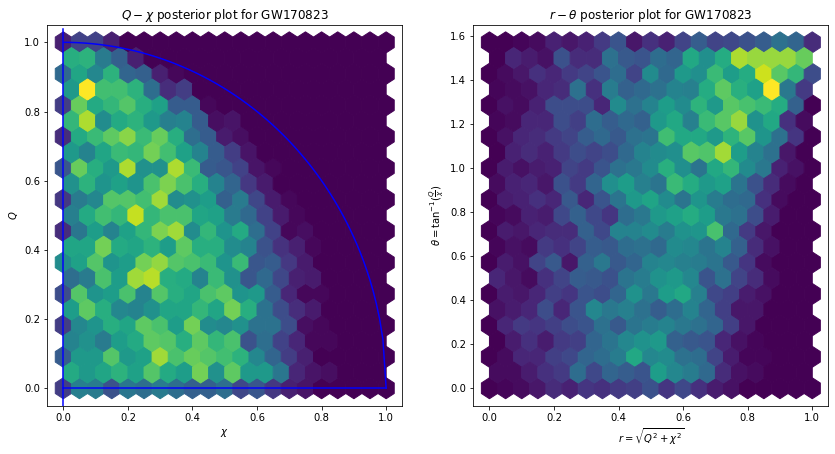

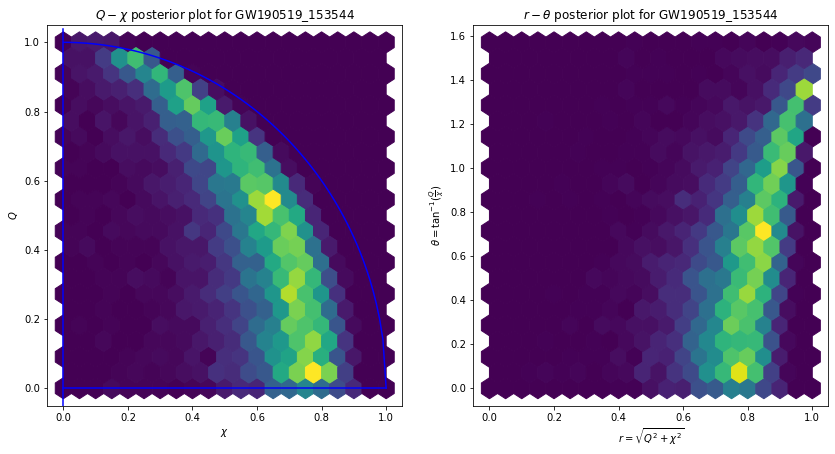

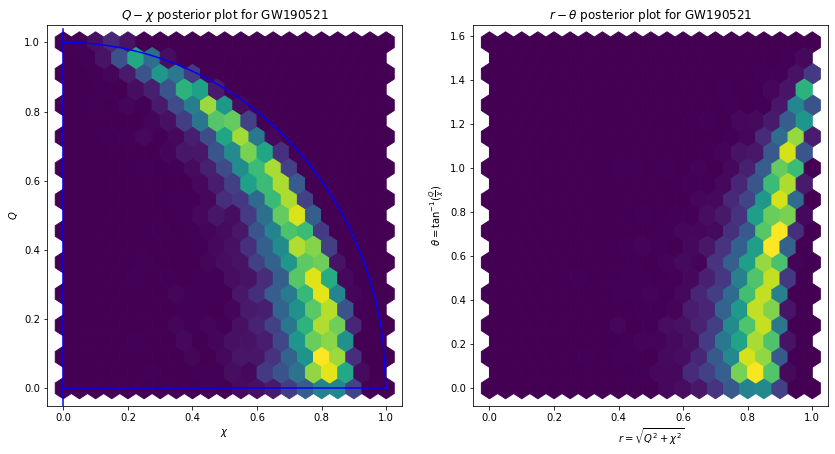

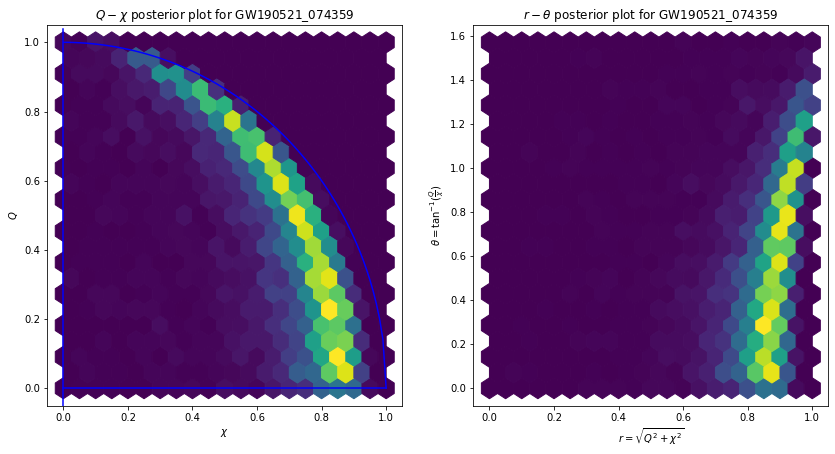

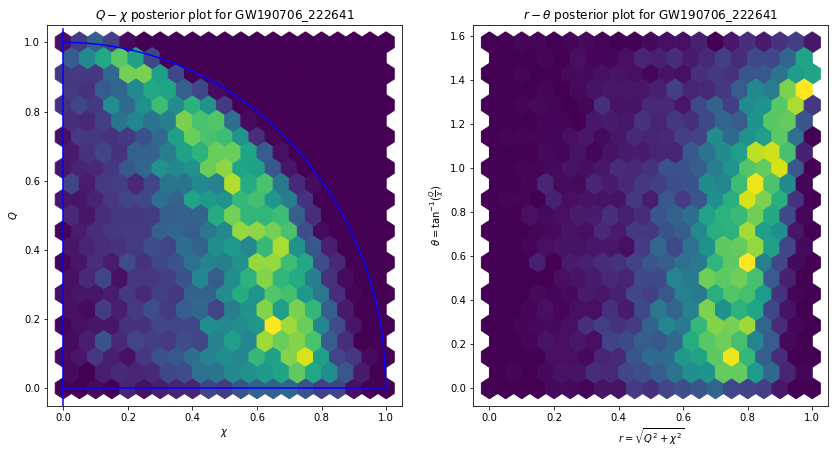

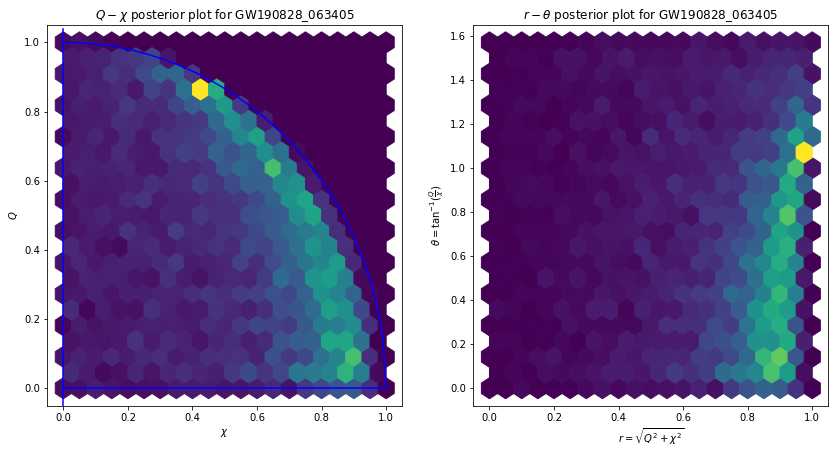

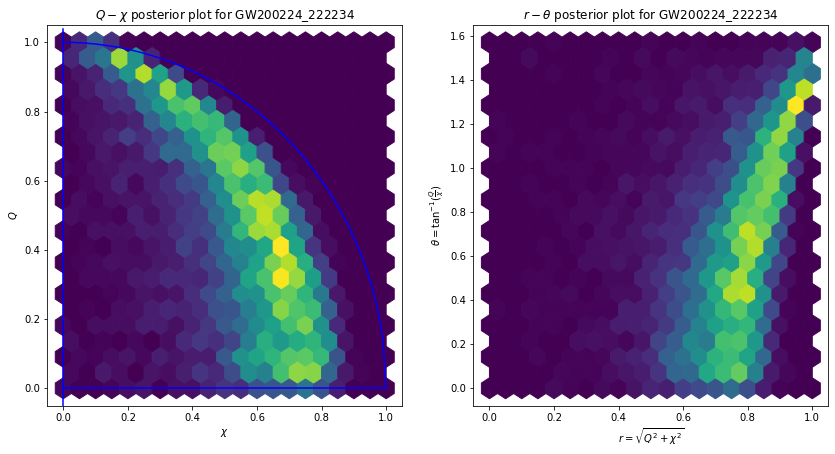

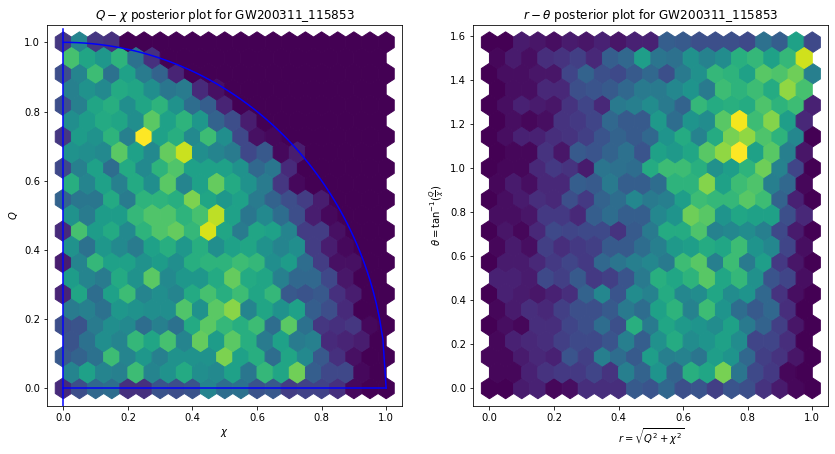

In [7]:
### Getting all the data into the right format

chosen_events = events

for event in chosen_events:
    show_plot(event, points)

In [8]:
events_that_look_alright = ['GW150914','GW190519_153544','GW190521','GW190521_074359',
                            'GW190706_222641','GW200224_222234']



r_thetas = np.array([points[event] for event in events_that_look_alright])
nobs, nsamp, _ = r_thetas.shape

analysis_data = {
             'nsamp': nsamp,
             'nobs': nobs,
             'r_thetas': r_thetas,
             'r_mean': 0.7,
             'theta_mean': 0.0
            }

compiled = pystan.StanModel(file='recycling.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3c016dc7541e9847e432186d5922d092 NOW.
/Users/asadh/opt/anaconda3/envs/ringdown/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/x2/flf3cm9506vdxng0c9g04p440000gn/T/tmptty6dgp4/stanfit4anon_model_3c016dc7541e9847e432186d5922d092_9125817307810644169.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [12]:
fit = compiled.sampling(data=analysis_data, iter=8000, chains=1)

In [11]:
#import multiprocessing
#multiprocessing.set_start_method('fork')

In [16]:
arviz.traceplot(fit)

AttributeError: module 'arviz' has no attribute 'traceplot'

array([[<AxesSubplot:title={'center':'mu_r'}>,
        <AxesSubplot:title={'center':'mu_r'}>],
       [<AxesSubplot:title={'center':'mu_theta'}>,
        <AxesSubplot:title={'center':'mu_theta'}>],
       [<AxesSubplot:title={'center':'sigma_r'}>,
        <AxesSubplot:title={'center':'sigma_r'}>],
       [<AxesSubplot:title={'center':'sigma_theta'}>,
        <AxesSubplot:title={'center':'sigma_theta'}>]], dtype=object)

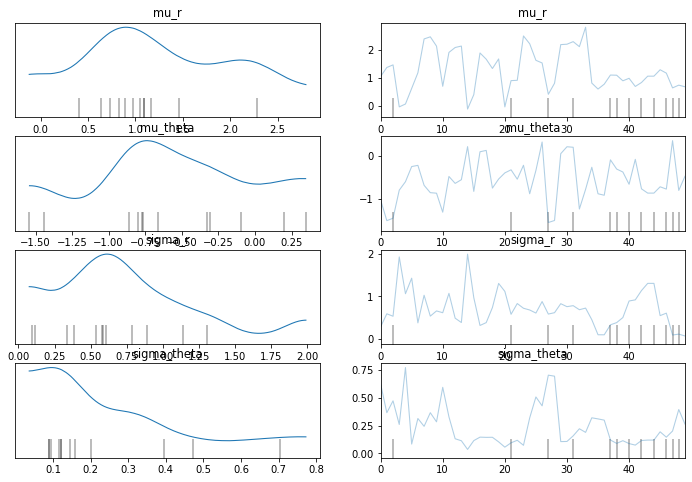

In [17]:
arviz.plot_trace(fit)

In [17]:
eventname = "GW150914"
import arviz as az
result_old = az.from_netcdf(f"./ChargedResults/{eventname}/{eventname}-charged-posteriors.nc")

/Users/asadh/opt/anaconda3/envs/Hierarchical_Analysis/lib/python3.7/site-packages/arviz/plots/traceplot.py:216: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (29), generating only 20 plots
  UserWarning,
/Users/asadh/opt/anaconda3/envs/Hierarchical_Analysis/lib/python3.7/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/asadh/opt/anaconda3/envs/Hierarchical_Analysis/lib/python3.7/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/asadh/opt/anaconda3/envs/Hierarchical_Analysis/lib/python3.7/site-packages/arviz/stats/density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn(

array([[<AxesSubplot:title={'center':'log_drift_unit'}>,
        <AxesSubplot:title={'center':'log_drift_unit'}>],
       [<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'r2_qchi'}>,
        <AxesSubplot:title={'center':'r2_qchi'}>],
       [<AxesSubplot:title={'center':'theta_qchi'}>,
        <AxesSubplot:title={'center':'theta_qchi'}>],
       [<AxesSubplot:title={'center':'Apx_unit'}>,
        <AxesSubplot:title={'center':'Apx_unit'}>],
       [<AxesSubplot:title={'center':'Apy_unit'}>,
        <AxesSubplot:title={'center':'Apy_unit'}>],
       [<AxesSubplot:title={'center':'Acx_unit'}>,
        <AxesSubplot:title={'center':'Acx_unit'}>],
       [<AxesSubplot:title={'center':'Acy_unit'}>,
        <AxesSubplot:title={'center':'Acy_unit'}>],
       [<AxesSubplot:title={'center':'dts'}>,
        <AxesSubplot:title={'center':'dts'}>],
       [<AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'q

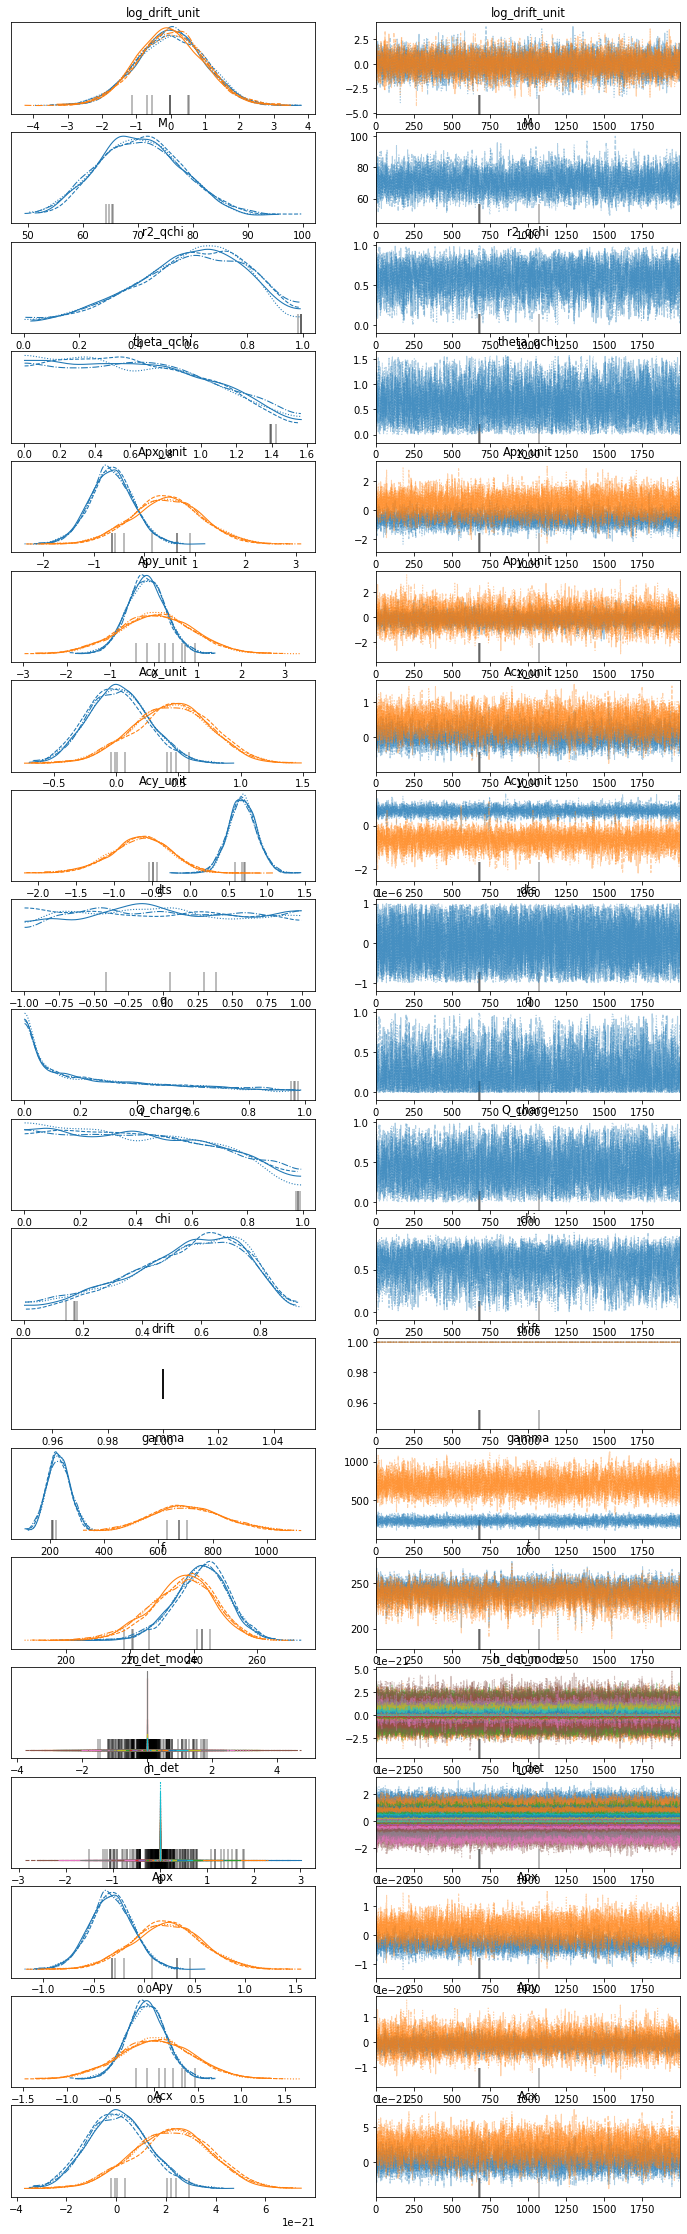

In [19]:
az.plot_trace(result_old)